In [1]:
import pandas as pd

In [2]:
# I imported the internet growth dataset from africaopendata.org and stored it in a variable
df = pd.read_csv("internet growth.csv")

In [3]:
# I called on the variable
df.head()

,SN,STATES,Active Internet per state Q4 2018,MTN-Q-o-Q growth rate Q3 2019 - Q4 2019.,GLO -Q-o-Q growth rate Q3 2019 - Q4 2019.,AIRTEL -Q-o-Q growth rate Q3 2019 - Q4 2019.,9MOBILE -Q-o-Q growth rate Q3 2019 - Q4 2019.,OTHERS -Q-o-Q growth rate Q3 2019 - Q4 2019.,sub total,"Y-o-Y growth rate of (%) Active Internet Subscriptions Per State, Q4 2018 - Q4 2019.",Unnamed: 10,Unnamed: 11
0,1,ABIA,2266320,4.448471,-1.656513,1.560568,-4.882596,1.648352,1.814070,10.896211,NaN,NaN
1,2,ADAMAWA,1890285,6.543428,-4.555410,8.766769,-1.271074,36.111111,4.969337,17.363625,NaN,NaN
2,3,AKWA IBOM,2075045,3.688190,-3.290046,1.611997,-5.709180,12.887828,1.101149,18.501912,NaN,NaN
3,4,ANAMBRA,3055645,6.566736,-0.901486,2.899111,-6.571665,-4.457577,3.379966,17.910294,NaN,NaN
4,5,BAUCHI,1989597,12.809570,-6.106196,11.061719,0.324018,80.434783,9.074889,23.196205,NaN,NaN


In [4]:
# From the dataset, I realised only the first 3 columns would be useful for me, so i imported them only
#while skipping the last column(Other column)
Active_internet_growth_Q4_2018 = pd.read_csv("internet growth.csv",
                                            usecols = [0,1,2],
                                            index_col = 0,
                                            skipfooter = 1,
                                            engine = 'python')

In [5]:
Active_internet_growth_Q4_2018.head()

,STATES,Active Internet per state Q4 2018
SN,,
1,ABIA,2266320
2,ADAMAWA,1890285
3,AKWA IBOM,2075045
4,ANAMBRA,3055645
5,BAUCHI,1989597


In [6]:
# For visualization, i imported the matplotlib library and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

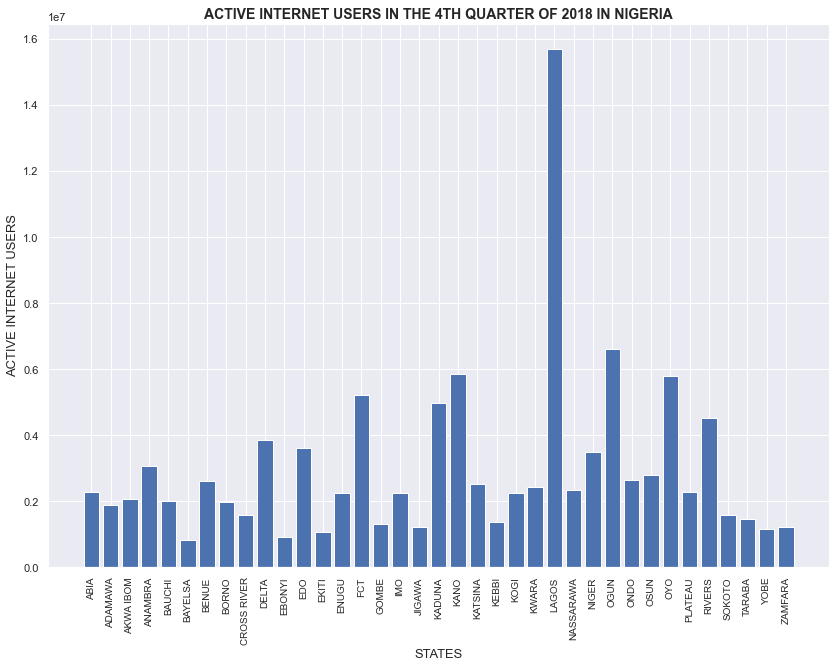

In [7]:
# I ran the following code to visualize the data in a bar chart
plt.figure(figsize = (14, 10))
plt.bar(x= Active_internet_growth_Q4_2018["STATES"],
       height = Active_internet_growth_Q4_2018["Active Internet per state Q4 2018"])
plt.xlabel("STATES", fontsize = 13)
plt.ylabel("ACTIVE INTERNET USERS", fontsize = 13)
plt.title("ACTIVE INTERNET USERS IN THE 4TH QUARTER OF 2018 IN NIGERIA", fontweight = 'bold', fontsize = 14)
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

In [8]:
# i called on the max function to view the maximum value in my dataset
Active_internet_growth_Q4_2018.iloc[:,1:].max()

Active Internet per state Q4 2018    15675147
dtype: int64

In [9]:
# I called on the min to view the minimum value in the dataset
Active_internet_growth_Q4_2018.iloc[:,1:].min()

Active Internet per state Q4 2018    823987
dtype: int64

In [10]:
Active_internet_growth_Q4_2018['STATES'].values

array(['ABIA', 'ADAMAWA', 'AKWA IBOM', 'ANAMBRA', 'BAUCHI', 'BAYELSA',
       'BENUE', 'BORNO', 'CROSS RIVER', 'DELTA', 'EBONYI', 'EDO', 'EKITI',
       'ENUGU', 'FCT', 'GOMBE', 'IMO', 'JIGAWA', 'KADUNA', 'KANO',
       'KATSINA', 'KEBBI', 'KOGI', 'KWARA', 'LAGOS', 'NASSARAWA', 'NIGER',
       'OGUN', 'ONDO', 'OSUN', 'OYO', 'PLATEAU', 'RIVERS', 'SOKOTO',
       'TARABA', 'YOBE', 'ZAMFARA'], dtype=object)

In [12]:
# I stored the dataset in a new variable for manipulations
AIG = Active_internet_growth_Q4_2018.copy()

In [13]:
# i called on the states values 
AIG['STATES'].values

array(['ABIA', 'ADAMAWA', 'AKWA IBOM', 'ANAMBRA', 'BAUCHI', 'BAYELSA',
       'BENUE', 'BORNO', 'CROSS RIVER', 'DELTA', 'EBONYI', 'EDO', 'EKITI',
       'ENUGU', 'FCT', 'GOMBE', 'IMO', 'JIGAWA', 'KADUNA', 'KANO',
       'KATSINA', 'KEBBI', 'KOGI', 'KWARA', 'LAGOS', 'NASSARAWA', 'NIGER',
       'OGUN', 'ONDO', 'OSUN', 'OYO', 'PLATEAU', 'RIVERS', 'SOKOTO',
       'TARABA', 'YOBE', 'ZAMFARA'], dtype=object)

In [14]:
# In order to figure out the geopolitical zone with the highest number of active internet users,
# i created a function that contained a dictionary which assigns state values to their keys(geopolitical zones)
#i then used a loop to run through the entire data set and appoint each state its appropiate zone
def get_geopolitical_zone(state):
    dictionary = {'South_West' : ['EKITI', 'LAGOS', 'OGUN', 'ONDO', 'OSUN', 'OYO'],
                 'South_South' : ['AKWA IBOM', 'BAYELSA', 'CROSS RIVER', 'RIVERS', 'EDO', 'DELTA'],
                 'South_East' : ['ABIA', 'ANAMBRA', 'EBONYI', 'ENUGU', 'IMO'],
                 'North_West' : ['JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'SOKOTO', 'ZAMFARA'],
                 'North_East' : ['ADAMAWA', 'BAUCHI', 'BORNO', 'GOMBE', 'TARABA', 'YOBE'],
                 'North_Central' : ['BENUE', 'KOGI', 'KWARA', 'NASSARAWA', 'NIGER', 'PLATEAU','FCT']}
    for x in dictionary.keys():
        if state in dictionary[x]:
            return x

In [21]:
# i created a new column and applied the function i created above
# i called on the dataset and voila it worked as intended
AIG['GEOPOLITICAL ZONES'] = AIG['STATES'].apply(lambda x: get_geopolitical_zone(x))
AIG.head()

,STATES,Active Internet per state Q4 2018,GEOPOLITICAL ZONES
SN,,,
1,ABIA,2266320,South_East
2,ADAMAWA,1890285,North_East
3,AKWA IBOM,2075045,South_South
4,ANAMBRA,3055645,South_East
5,BAUCHI,1989597,North_East


In [20]:
# I then saved my new file and exported to Tableau for visualization
AIG.to_csv("AIG.csv")